In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the dataset
df = pd.read_csv('Data/features_3_sec.csv')
df = df.drop(labels='filename', axis=1)

df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
# Encode class labels
class_list = df.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(class_list)

In [4]:
# Standardize feature data
X = StandardScaler().fit_transform(np.array(df.iloc[:, :-1], dtype=float))

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Define a function to create and train the model
def create_and_train_model(input_shape, num_classes, epochs=50, optimizer='adam'):
    model = keras.Sequential([
        keras.layers.Dense(512, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation='softmax'),
    ])
    
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy')
    
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=epochs, batch_size=32)
    
    return model, history

In [7]:
# Define a function to plot validation metrics
def plot_validation(history):
    max_val_accuracy = max(history.history["val_accuracy"])
    print("Validation Accuracy:", max_val_accuracy)
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

In [8]:
# Create and train the model
input_shape = (X_train.shape[1],)
num_classes = len(label_encoder.classes_)
model, model_history = create_and_train_model(input_shape, num_classes, epochs=50, optimizer='adam')

Epoch 1/50
250/250 [==============================] - 7s 16ms/step - loss: 1.3785 - accuracy: 0.5071 - val_loss: 0.8753 - val_accuracy: 0.7087
Epoch 2/50
250/250 [==============================] - 3s 11ms/step - loss: 0.9072 - accuracy: 0.6862 - val_loss: 0.7453 - val_accuracy: 0.7588
Epoch 3/50
250/250 [==============================] - 3s 10ms/step - loss: 0.7629 - accuracy: 0.7401 - val_loss: 0.6210 - val_accuracy: 0.7893
Epoch 4/50
250/250 [==============================] - 3s 11ms/step - loss: 0.6293 - accuracy: 0.7878 - val_loss: 0.5471 - val_accuracy: 0.8123
Epoch 5/50
250/250 [==============================] - 3s 11ms/step - loss: 0.5446 - accuracy: 0.8186 - val_loss: 0.5147 - val_accuracy: 0.8308
Epoch 6/50
250/250 [==============================] - 3s 11ms/step - loss: 0.4736 - accuracy: 0.8462 - val_loss: 0.4578 - val_accuracy: 0.8488
Epoch 7/50
250/250 [==============================] - 3s 12ms/step - loss: 0.4256 - accuracy: 0.8621 - val_loss: 0.4502 - val_accuracy: 0.8453

Validation Accuracy: 0.9319319128990173


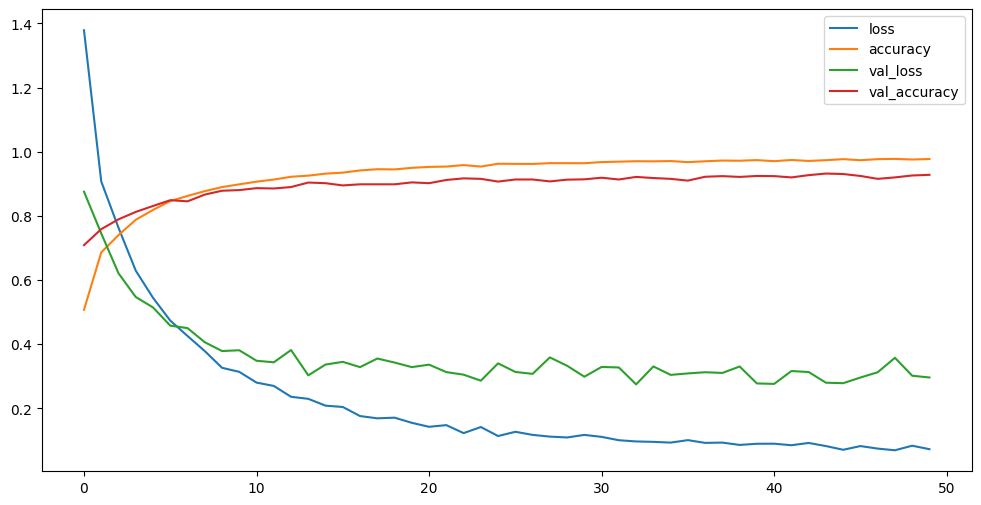

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [9]:
# Plot validation metrics
plot_validation(model_history)

# Display model summary
print(model.summary())